## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# read the wine datasets
wine = datasets.load_wine()
# define the model
def diff_depth_randomForest(*data,maxdepth):
    x_train, x_test, y_train, y_test = data
    depths = np.arange(1, maxdepth)
    acc = []
    for depth in depths:
        clf = RandomForestClassifier(n_estimators=20, max_depth=depth)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc.append(metrics.accuracy_score(y_test, y_pred))
    return acc

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 4)
diff_depth_randomForest(x_train, x_test, y_train, y_test, maxdepth=5)
        
    

[1.0, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777]

In [3]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

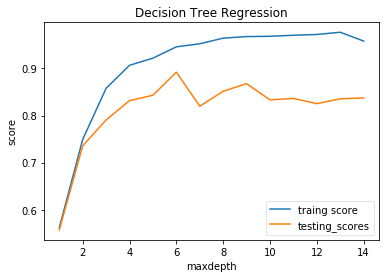

In [4]:
# try with different depth

# read in the data
boston = datasets.load_boston()

#define the model
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train, X_test, y_train, y_test = data
    depths = np.arange(1,maxdepth)
    training_scores = []
    testing_scores = []
    for depth in depths:
        regr = RandomForestRegressor(max_depth=depth)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    #绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label='traing score')
    ax.plot(depths,testing_scores,label='testing_scores')
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.25, random_state = 4)
test_DecisionTreeRegressor_depth(X_train, X_test, y_train, y_test,maxdepth=15)

# --------------------- 
# 作者：Jack_丁明 
# 来源：CSDN 
# 原文：https://blog.csdn.net/dingming001/article/details/80686405 
# 版权声明：本文为博主原创文章，转载请附上博文链接！